# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
## Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
## libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# Removes the limit for the number of displayed columns
#pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
#pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
#pd.set_option("display.float_format", lambda x: "%.5f" % x)
## Library to split data
from sklearn.model_selection import train_test_split
## To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,plot_confusion_matrix,
    precision_recall_curve,roc_curve,make_scorer,)


## Data Overview

In [2]:
data=pd.read_csv("INNHotelsGroup.csv")   # Code to upload the dataset

In [3]:
data.head()  # print the first five rows of the dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [4]:
data.tail()  # print the last five(5) rows of the dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [5]:
data.shape  # Check the dimension of the dataset

(36275, 19)

### Observation:
The dataset consist of 19 columns and 36275 rows.

In [6]:
data.info()  # Code to check the data types in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observation:
The Hotel dataset consist of 13 integers variables, one floating  and five(5) object variables as thier data types. <br>
The memory used is 5.3 MB.

In [7]:
data.describe().T  # print the statistical summary for numerical data

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


### Observation:
The dataset has 36275 adults with distribution that is skewed to the left with mean less than the median.<br>
The average price per room range from 0 to 540 with mean greater than the  median.<br>
75% of the dataset have an average price per room of 120 and more.<br>
The arrival month has a distribution that is skewed to the left with mean less than the median.
On average 3% customers visiting the hotel require car parking space.<br>
75% of the customers visiting the hotel have number of weekends nights of two(2) or more.




In [8]:
data.isnull().sum()  # Code the check for missing values in a dataset

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
data.isnull().sum().sum()  # Code to compute the total number of missing values in a dataset

0

### Observation:
There are no missing values in a dataset

In [10]:
data.duplicated().sum()  # Code to check for duplicates in a dataset

0

### Observation:
There are no duplicates from the Hotel dataset

## Exploratory Data Analysis (EDA)

## Univariate data analysis

 ###  Numerical dataset analysis

####  Histogram and boxplot for number of adults

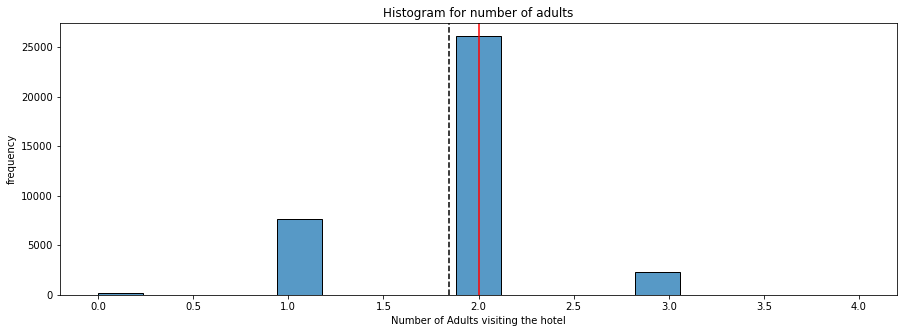

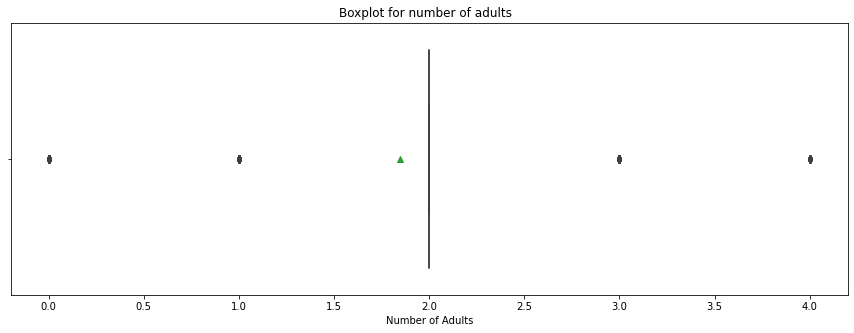

In [282]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for number of adults")      # Give the graph a title
plt.xlabel("Number of Adults visiting the hotel")  # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="no_of_adults",kde=False);  # histogram for number of adults
plt.axvline(data["no_of_adults"].mean(),color="black",linestyle="--")
plt.axvline(data["no_of_adults"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for number of adults  ")          # Give the plot a suitable title
sns.boxplot(data=data,x="no_of_adults",showmeans=True);  # Boxplot for number of adults
plt.xlabel("Number of Adults")                     # change the label on the x-axis
plt.show()

### Observation:
The number of adults who book or stay at the hotel range from zero to a maximum of 4.
It has a distribution that is skewed to the left with mean less  than the  mean.


####  Histogram and boxplot for number of  week nights

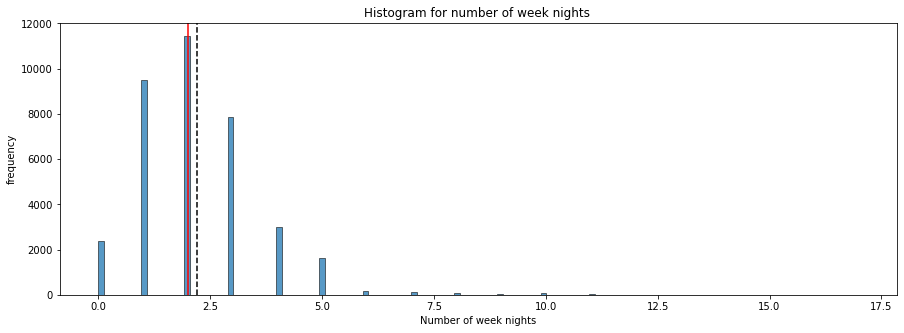

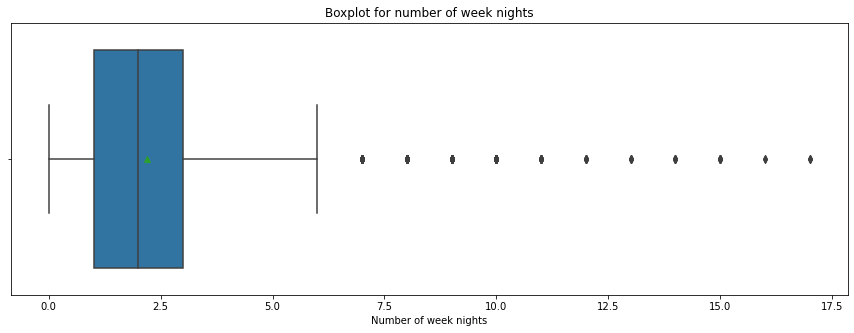

In [283]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for number of week nights ")      # Give the graph a title
plt.xlabel("Number of week nights")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="no_of_week_nights",kde=False);  # histogram for number of week nights.
plt.axvline(data["no_of_week_nights"].mean(),color="black",linestyle="--")
plt.axvline(data["no_of_week_nights"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for number of week nights")          # Give the plot a suitable title
sns.boxplot(data=data,x="no_of_week_nights",showmeans=True);  # Boxplot for number of week nights
plt.xlabel("Number of week nights")                     # change the label on the x-axis
plt.show()

### Observation:
The number of week nights dataset is slightly skewed to the right with mean greater than the median. <br>
50% of the customers visiting the hotel book or stay for more than 2 and half nights with outliers on the right side of the whiskers.

####  Histogram and boxplot for number of weekend nights

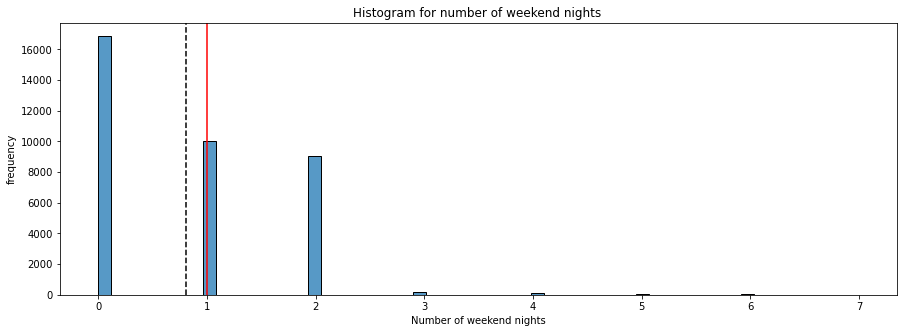

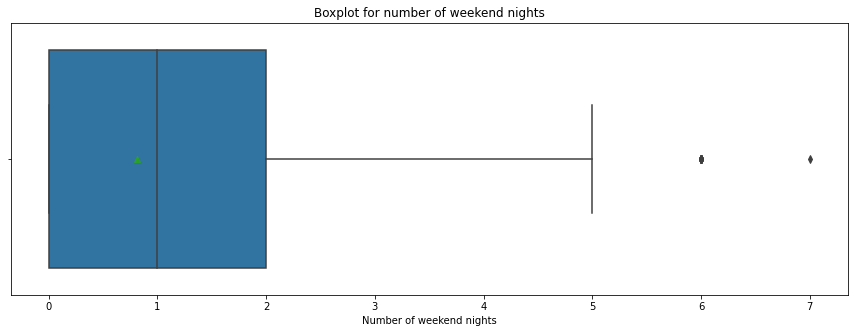

In [284]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for number of weekend nights ")      # Give the graph a title
plt.xlabel("Number of weekend nights")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="no_of_weekend_nights",kde=False);  # histogram for number of weekend nights.
plt.axvline(data["no_of_weekend_nights"].mean(),color="black",linestyle="--")
plt.axvline(data["no_of_weekend_nights"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for number of weekend nights")          # Give the plot a suitable title
sns.boxplot(data=data,x="no_of_weekend_nights",showmeans=True);  # Boxplot for number of weekend nights
plt.xlabel("Number of weekend nights")                   # change the label on the x-axis
plt.show()

In [285]:
data["no_of_weekend_nights"].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

### Observation:
75% of the guest that stayed or booked to stay at the hotel spent  two or more number of weekend nights (Saturday or Sunday) with a maximum of seven(7) weekend nights. 

####  Histogram and boxplot for  lead time

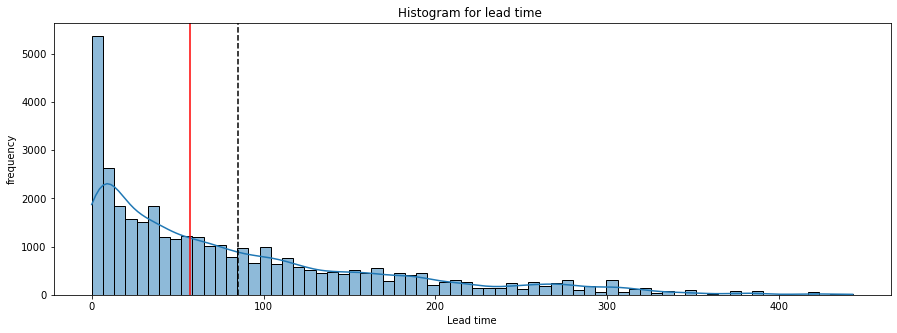

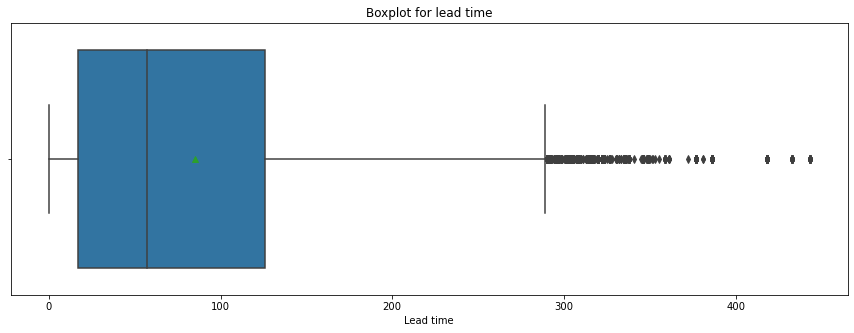

In [286]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for lead time ")      # Give the graph a title
plt.xlabel("Lead time")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="lead_time",kde=True);  # histogram for lead time.
plt.axvline(data["lead_time"].mean(),color="black",linestyle="--")
plt.axvline(data["lead_time"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for lead time")          # Give the plot a suitable title
sns.boxplot(data=data,x="lead_time",showmeans=True);  # Boxplot for lead time
plt.xlabel("Lead time")                   # change the label on the x-axis
plt.show()

### Observation:
The lead time distribution is skewed to the right with mean greater than median as evidenced by the histogram and boxplot above. <br>
75% of the customers visiting the hotels have lead time of more than 100 with outliers on the right side of the whisker.

####  Percentage of car parking space

In [287]:
data["required_car_parking_space"].value_counts(normalize=True)*100  # Code to compute the percentage car parking space

0   96.90145
1    3.09855
Name: required_car_parking_space, dtype: float64

#### Observation:
Approximately 97% of the customers visiting the hotel on average does not require car parking space whereas 3% do require the parking space for thier cars.

####  Histogram and boxplot for arrival year

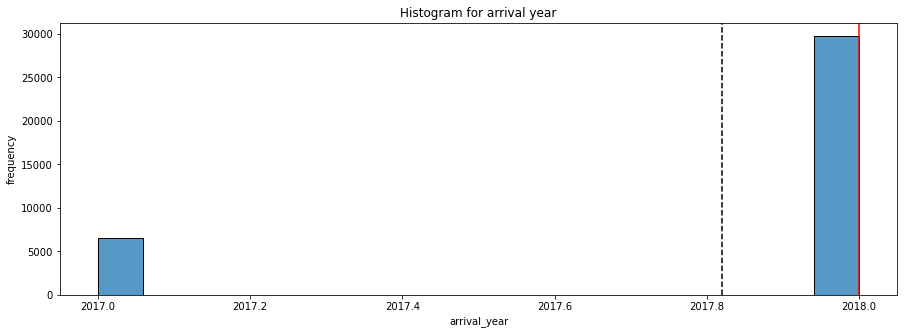

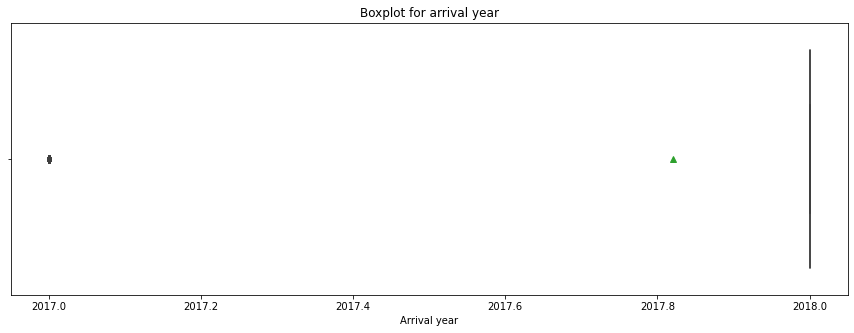

In [288]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for arrival year")      # Give the graph a title
plt.xlabel("arrival_year")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="arrival_year",kde=False);  # histogram for arrival year.
plt.axvline(data["arrival_year"].mean(),color="black",linestyle="--")
plt.axvline(data["arrival_year"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for arrival year")          # Give the plot a suitable title
sns.boxplot(data=data,x="arrival_year",showmeans=True);  # Boxplot for arrival year
plt.xlabel("Arrival year")                   # change the label on the x-axis
plt.show()

In [289]:
data["arrival_year"].value_counts(normalize=True)* 100  # compute the arrival year count as a percentage

2018   82.04273
2017   17.95727
Name: arrival_year, dtype: float64

### Observation:
Approximately 82% of the guests booking or staying at the hotels arrived dominantely in year 2018.

####  Histogram and boxplot for arrival month

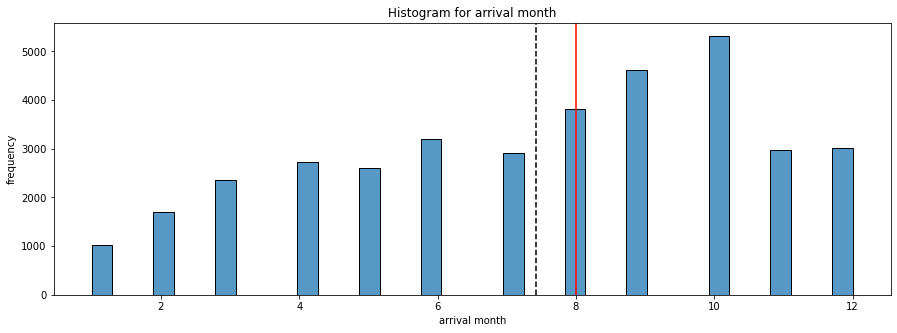

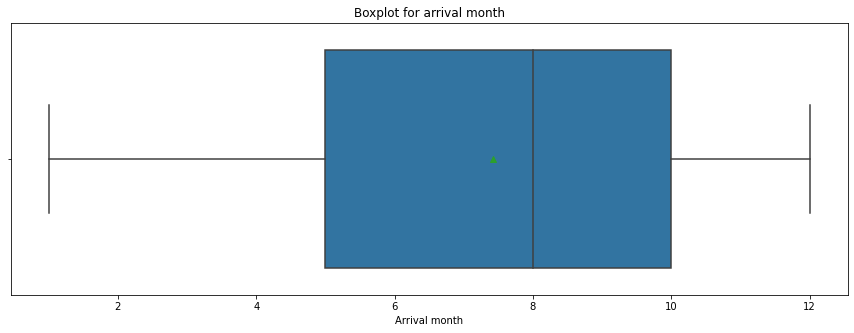

In [290]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for arrival month")      # Give the graph a title
plt.xlabel("arrival month")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="arrival_month",kde=False);  # histogram for arrival month.
plt.axvline(data["arrival_month"].mean(),color="black",linestyle="--")
plt.axvline(data["arrival_month"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for arrival month")          # Give the plot a suitable title
sns.boxplot(data=data,x="arrival_month",showmeans=True);  # Boxplot for arrival month
plt.xlabel("Arrival month")                   # change the label on the x-axis
plt.show()

### Observation:
The arrival month data is skewed to the left with mean less than the median.<br>
50% of the data has arrival month of august and below.

####  Histogram and boxplot for average price per room

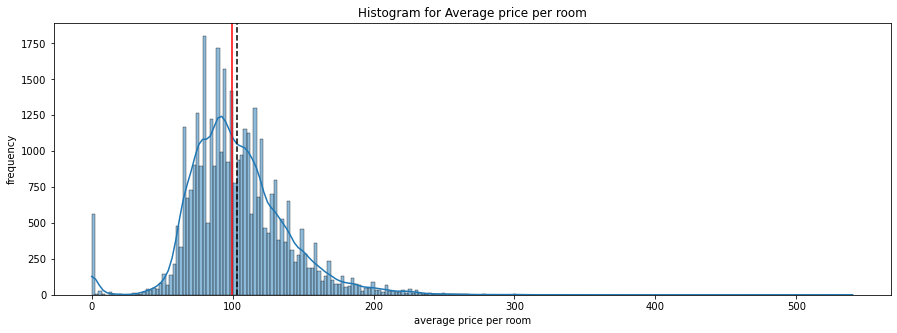

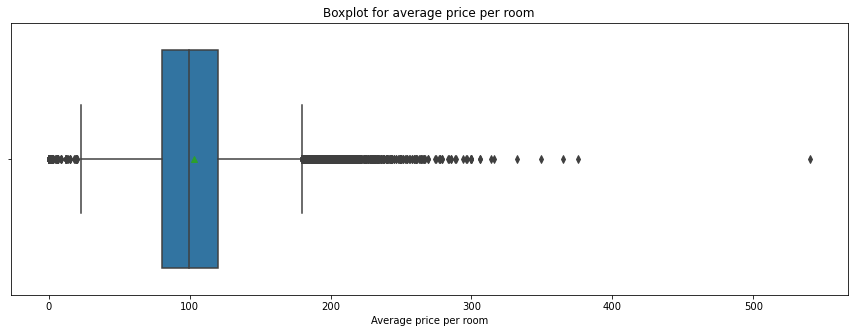

In [291]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for Average price per room")      # Give the graph a title
plt.xlabel("average price per room")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="avg_price_per_room",kde=True);  # histogram for average price per room.
plt.axvline(data["avg_price_per_room"].mean(),color="black",linestyle="--")
plt.axvline(data["avg_price_per_room"].median(),color="red",linestyle="-")
plt.show()
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Boxplot for average price per room")          # Give the plot a suitable title
sns.boxplot(data=data,x="avg_price_per_room",showmeans=True);  # Boxplot for average price per room
plt.xlabel("Average price per room")                   # change the label on the x-axis
plt.show()

### Observation:
The average price per room is approximately normal with outliers on both side of the whiskers as shown on the histogram and barplot. 
50% of the customers visiting the hotel spend an average price per room of 100 euros and above.

#### What are the busiest months in the hotel?

In [292]:
data["arrival_month"].value_counts(ascending=False)    # Code to print the value counts for arrival month.

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

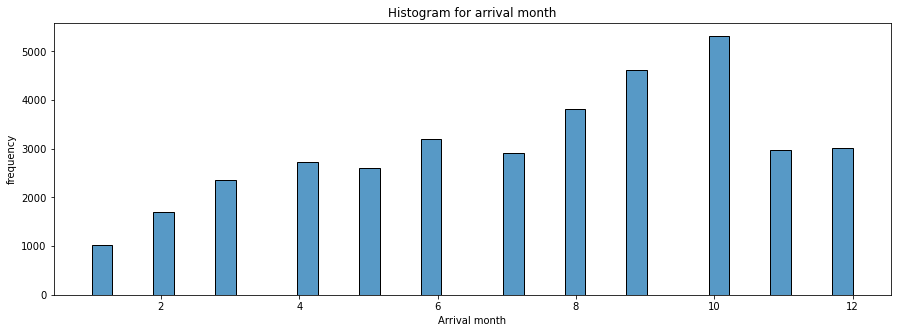

In [293]:
plt.figure(figsize=(15,5))  # increase the size of the plot
plt.title("Histogram for arrival month")      # Give the graph a title
plt.xlabel("Arrival month")                   # change the label on the x-axis
plt.ylabel("frequency")  # change the label on the y-axis
sns.histplot(data=data,x="arrival_month");  # histogram for arrival month
plt.show()

### Observation:
The top five busiest months include October ,september,August,June and December with January as the least busiest month.

####  Which market segment do most of the guests come from?

In [294]:
data["market_segment_type"].value_counts(ascending=False)  # code to count the market segment types

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [295]:
round(data["market_segment_type"].value_counts(normalize=True,ascending=False),2)*100

Online          64.00000
Offline         29.00000
Corporate        6.00000
Complementary    1.00000
Aviation         0.00000
Name: market_segment_type, dtype: float64

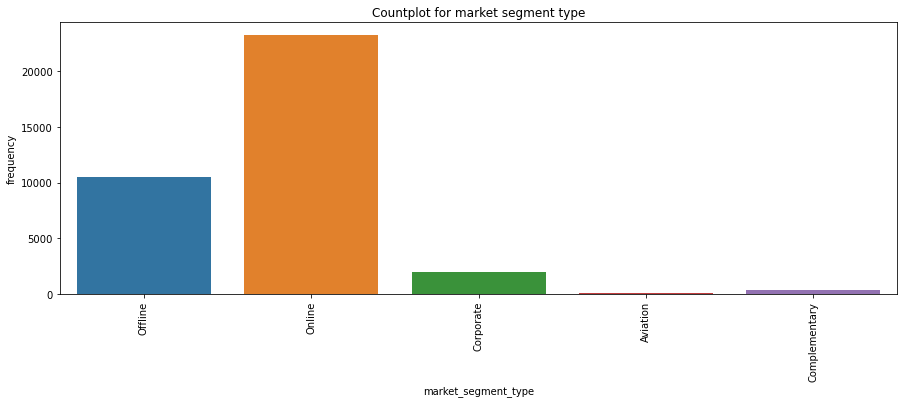

In [296]:
plt.figure(figsize=(15,5))  # increase the size of the plot
sns.countplot(data=data , x="market_segment_type"); # countplot for market segment type
plt.title("Countplot for market segment type")  # add the title on the countplot
plt.ylabel("frequency")  # add the label on the y-axis
plt.xticks(rotation=90) 
plt.show()

### Observation:
Online market segment is a type where most guests orginate from, followed by offline and corporate .<br>
Aviation is market segment with the least guest originating from it.

#### Finding the percentage of bookings that are canceled.

In [297]:
round(data["booking_status"].value_counts(normalize=True,ascending=False),3)*100  # 

Not_Canceled   67.20000
Canceled       32.80000
Name: booking_status, dtype: float64

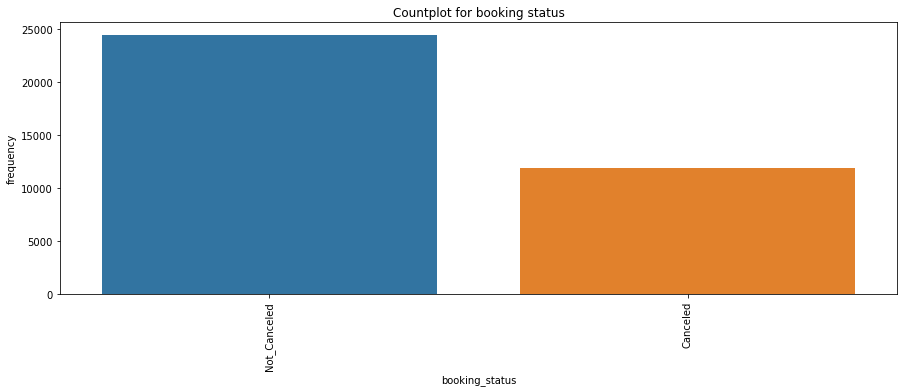

In [298]:
plt.figure(figsize=(15,5))  # increase the size of the plot
sns.countplot(data=data , x="booking_status"); # countplot for booking status
plt.title("Countplot for booking status")  # add the title on the countplot
plt.ylabel("frequency")  # add the label on the y-axis
plt.xticks(rotation=90) 
plt.show()

### Observation
About 33% of the bookings are cancelled.

#### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [299]:
round(data[data["repeated_guest"]==1]["booking_status"].value_counts(normalize=True,ascending=False),3)*100

Not_Canceled   98.30000
Canceled        1.70000
Name: booking_status, dtype: float64

### Observation:
About 2% of the repeating guests cancel thier bookings in the hotel.

### Categorical data analysis

#### Countplot for categorical independent variables

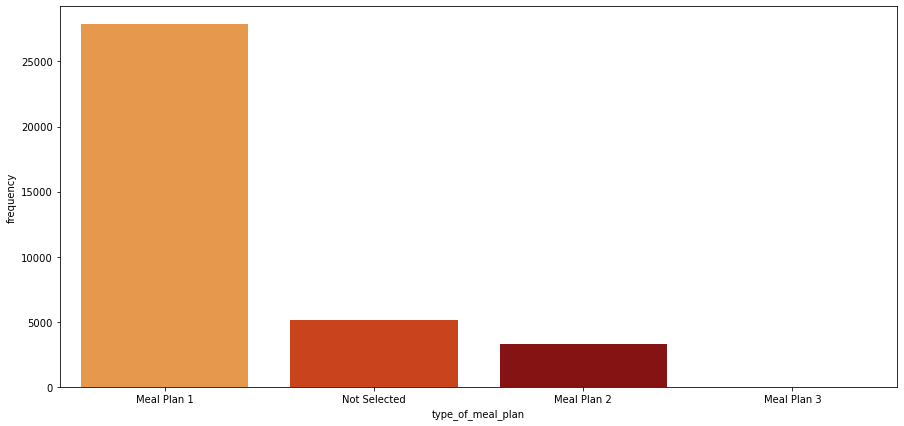

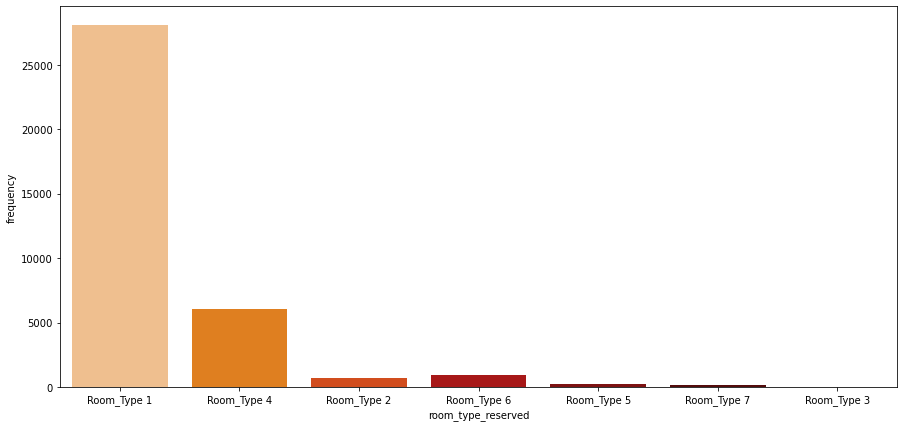

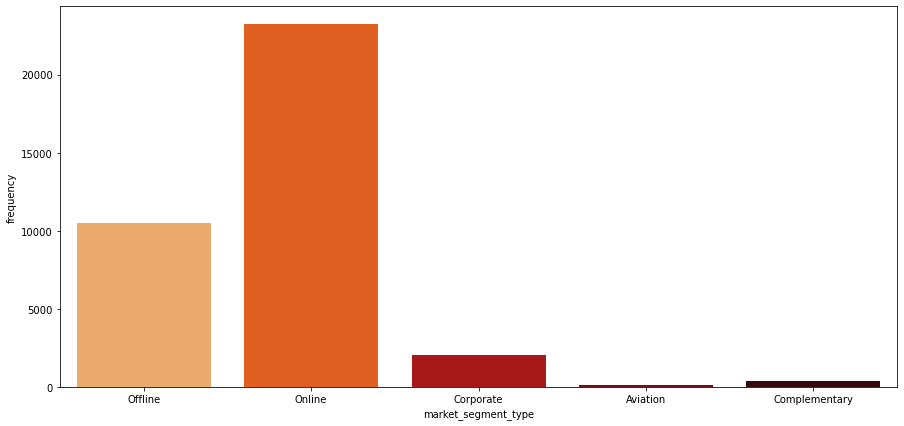

In [300]:
# First create a list for categorical independent variables
attributes=["type_of_meal_plan","room_type_reserved","market_segment_type"] 
for a in attributes:
    plt.figure(figsize=(15,7))
    sns.countplot(x=a,data=data,palette="gist_heat_r")
    plt.ylabel("frequency")
    plt.show()

In [301]:
 # code to count the number of elements in type of meal plan column as a percentage
data["type_of_meal_plan"].value_counts(normalize=True)*100 

Meal Plan 1    76.73329
Not Selected   14.14197
Meal Plan 2     9.11096
Meal Plan 3     0.01378
Name: type_of_meal_plan, dtype: float64

In [302]:
# code to count the number of elements in room type reserved column as a percentage
data["room_type_reserved"].value_counts(normalize=True)*100 

Room_Type 1   77.54652
Room_Type 4   16.69745
Room_Type 6    2.66299
Room_Type 2    1.90765
Room_Type 5    0.73053
Room_Type 7    0.43556
Room_Type 3    0.01930
Name: room_type_reserved, dtype: float64

In [303]:
# code to count the number of elements in market segment type as a percentage
data["market_segment_type"].value_counts(normalize=True)*100

Online          63.99449
Offline         29.02274
Corporate        5.56030
Complementary    1.07788
Aviation         0.34459
Name: market_segment_type, dtype: float64

### Observation:
Meal plan 1 is the most dominant type of meal for most customers visiting the hotel with meal plan 3 as the least type.<br>
Approximately 78% of the customers visiting the hotels prefer Room type 1 as compared to other rooms with room type 3 as the least preferred.<br>
64% of the customers choose online as thier market segment type followed by offline by 29%.



####  Countplot for booking status

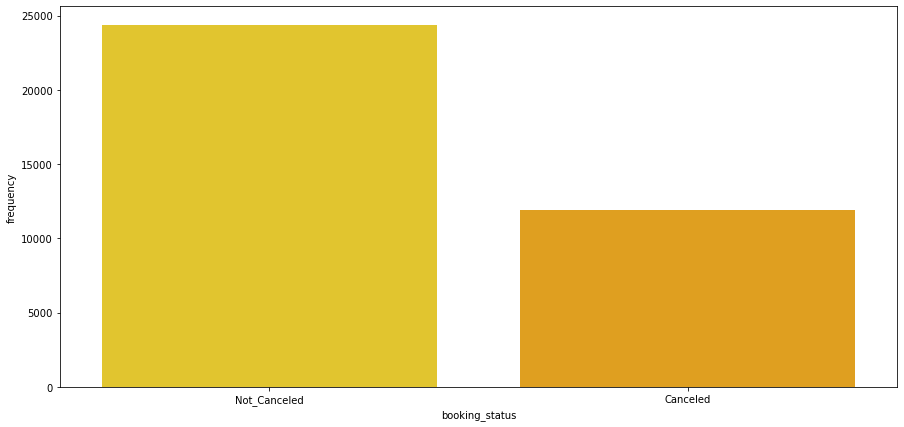

In [304]:
plt.figure(figsize=(15,7))
sns.countplot(x="booking_status",data=data,palette="Wistia")
plt.ylabel("frequency")
plt.show()

In [305]:
data["booking_status"].value_counts(normalize=True)*100 

Not_Canceled   67.23639
Canceled       32.76361
Name: booking_status, dtype: float64

### Observation:
Approximately 67% of the customers who book for hotels do not cancel thier bookings <br> whereas 33% of the customers cancel thier bookings.

## Bivariate data analysis

#### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

####  boxplot for Average price per room relative to market segment type

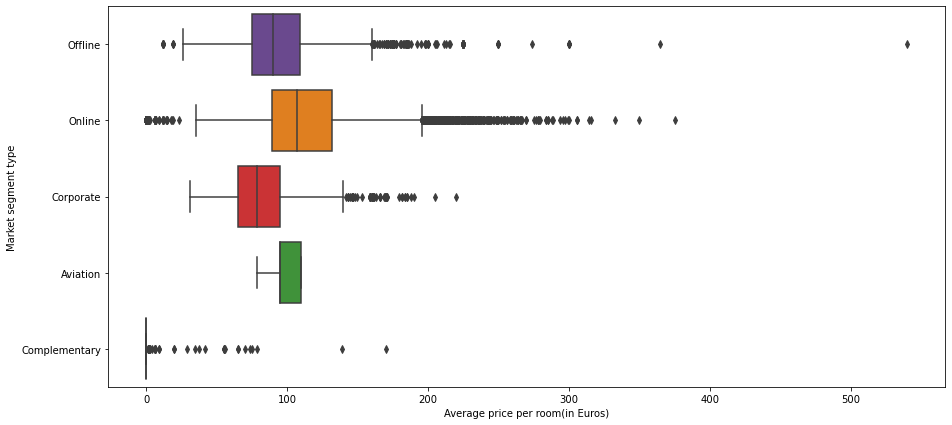

In [306]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "avg_price_per_room", y = "market_segment_type", palette = "Paired_r") 
plt.xlabel("Average price per room(in Euros)")
plt.ylabel("Market segment type")
plt.show()

### Observation:
About 60% of the market segment type have an rooms prices with an average of 100 euros and above.


####  boxplot for Average price per room relative to booking status

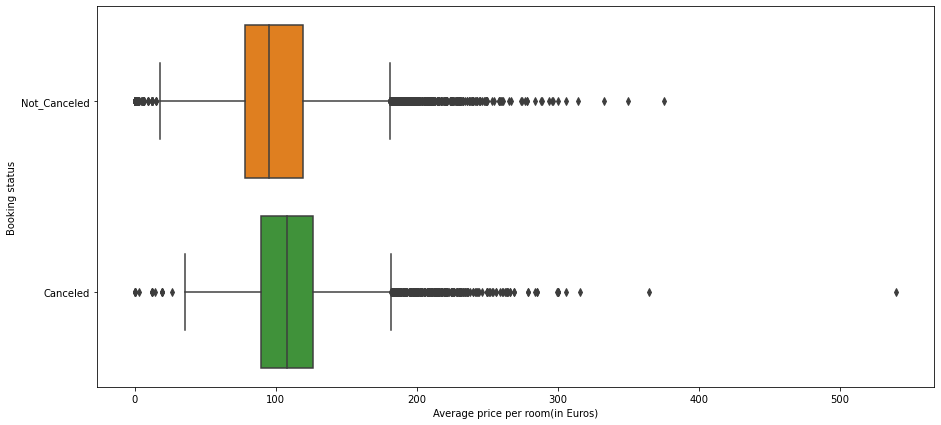

In [307]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "avg_price_per_room", y = "booking_status", palette = "Paired_r") 
plt.xlabel("Average price per room(in Euros)")
plt.ylabel("Booking status")
plt.show()

### Observation:
The average price per room for whether bookings were canceled or not have a normal distribution with mean equal to the median, with outliers on both side of the whiskers.
However the mean for price per room for canceled bookings is greater than that of not canceled.




####  Boxplot for Average price per room relative to type of meal plan

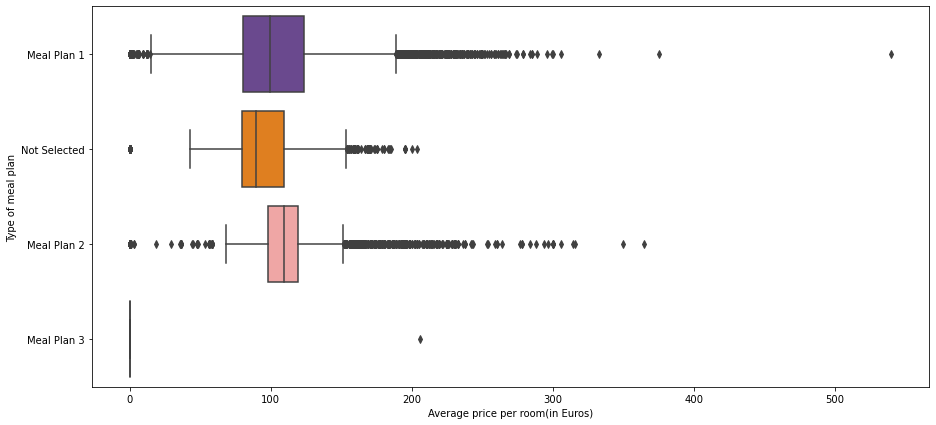

In [308]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "avg_price_per_room", y = "type_of_meal_plan", palette = "Paired_r") 
plt.xlabel("Average price per room(in Euros)")
plt.ylabel("Type of meal plan")
plt.show()

### Observation:
The average price per room for mean plan 1 is approximately normal with mean equal to the median.
Whereas the average price per room for meal plan 2 is skewed to the left with outliers on both sides of the whiskers.

#### Boxplot for Average price per room relative to room type reserved

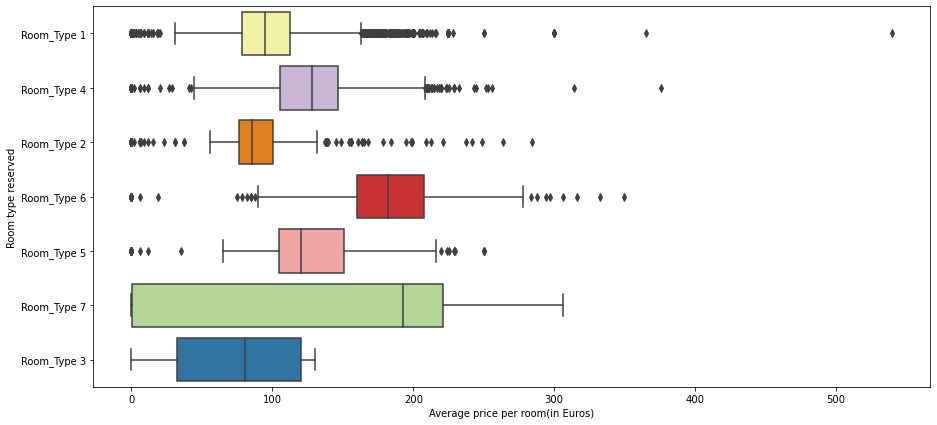

In [309]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "avg_price_per_room", y = "room_type_reserved", palette = "Paired_r") 
plt.xlabel("Average price per room(in Euros)")
plt.ylabel("Room type reserved")
plt.show()

### Observation:
Approximately 43% of the room type reserved have an average price per room of less than 100 euros.
Room type 7  has an average price per room that is skewed to the left with mean less than the median , with no outliers.


#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### Boxplot for number of special requests by guests relative to booking status

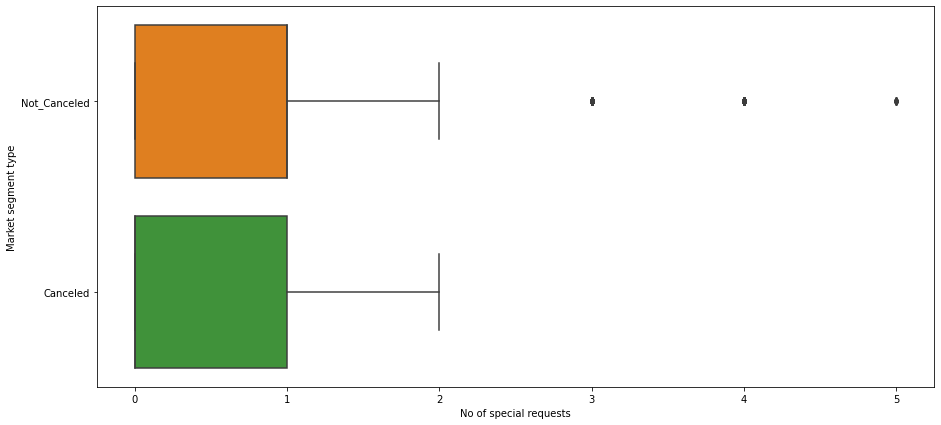

In [310]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "no_of_special_requests", y = "booking_status", palette = "Paired_r") 
plt.xlabel("No of special requests")
plt.ylabel("Market segment type")
plt.show()

In [311]:
data.groupby("no_of_special_requests")["booking_status"].value_counts(normalize=True)*100

no_of_special_requests  booking_status
0                       Not_Canceled      56.79324
                        Canceled          43.20676
1                       Not_Canceled      76.23318
                        Canceled          23.76682
2                       Not_Canceled      85.40330
                        Canceled          14.59670
3                       Not_Canceled     100.00000
4                       Not_Canceled     100.00000
5                       Not_Canceled     100.00000
Name: booking_status, dtype: float64

### Observation:
The special need requirements does affect the booking cancellation as been on the boxplot above.

#### Boxplot for lead time   relative to market segment type

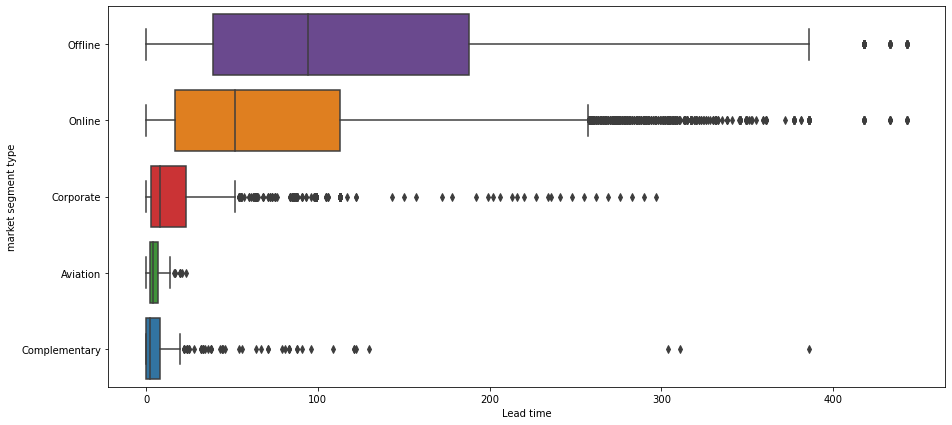

In [312]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "lead_time", y = "market_segment_type", palette = "Paired_r") 
plt.xlabel("Lead time")
plt.ylabel("market segment type")
plt.show()

### Observation:
The offline is the most dominant market segment type with an average lead time of more 100. <br>
Online market segment type has lead time distribution that is skewed to the right with mean greater than the median. <br>
Complimentary is the least dominant market segment by lead time.


#### Boxplot for lead time relative to booking status

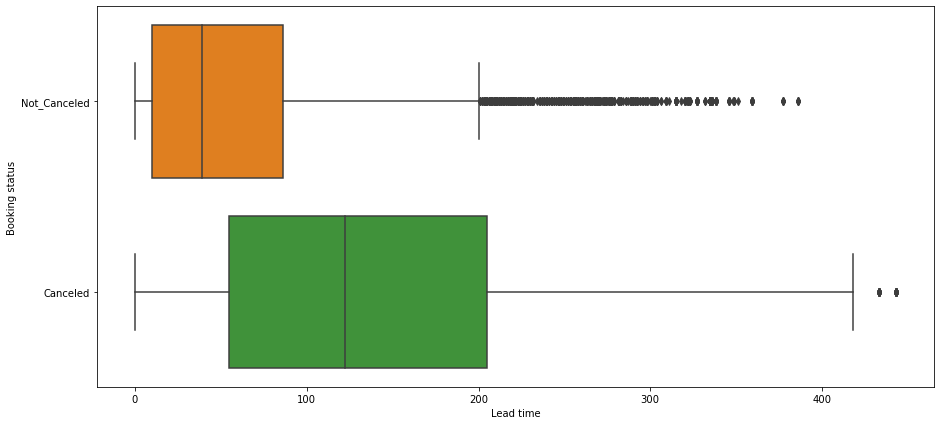

In [313]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "lead_time", y = "booking_status", palette = "Paired_r") 
plt.xlabel("Lead time")
plt.ylabel("Booking status")
plt.show()

### Observation:
The average lead time for canceled bookings is greater than that of not canceled bookings.


### Categorical data analysis

####  Countplot for categorical independent variables

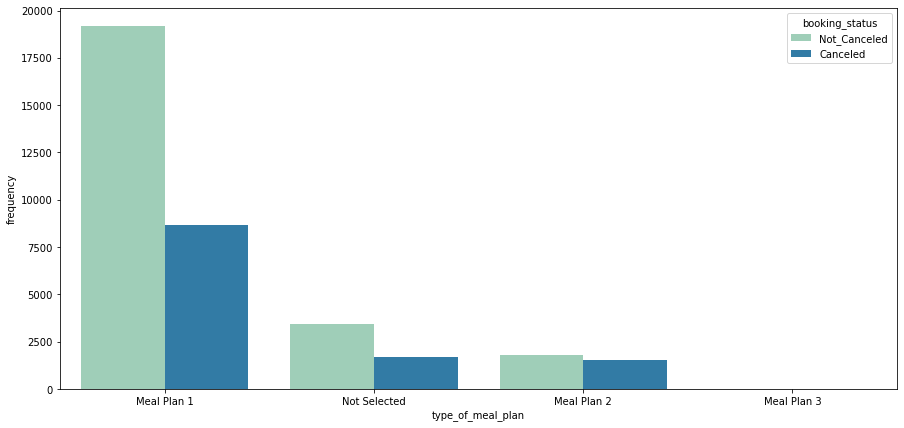

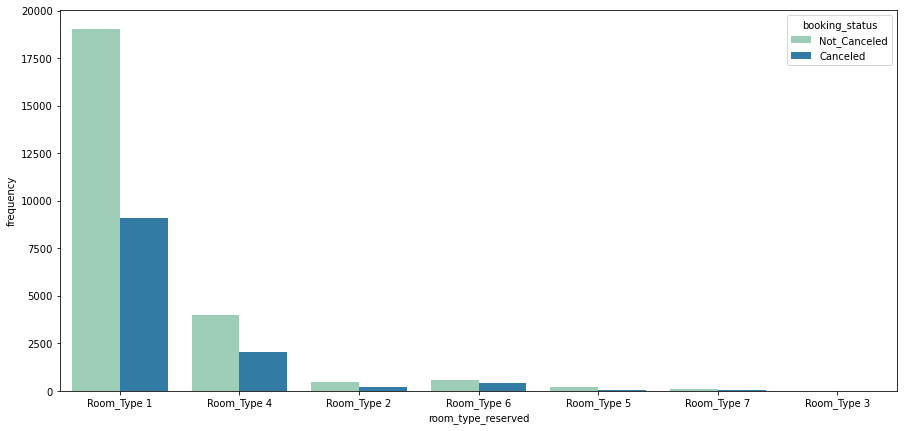

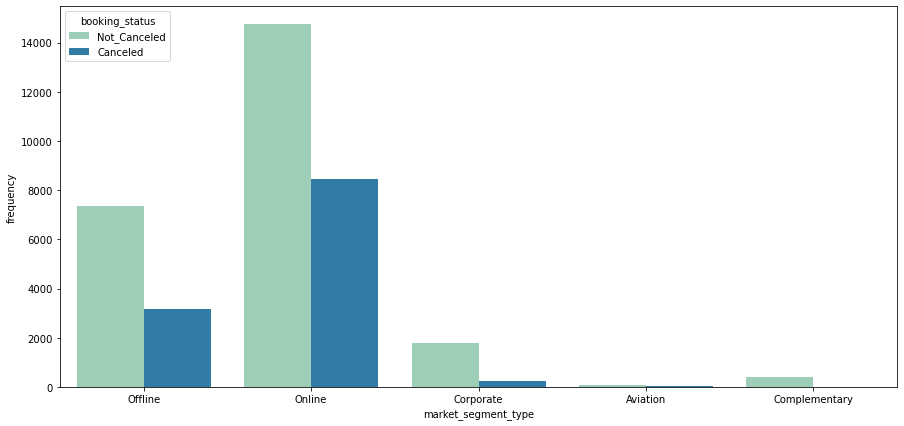

In [314]:
# First create a list for categorical independent variables
attributes=["type_of_meal_plan","room_type_reserved","market_segment_type"] 
for a in attributes:
    plt.figure(figsize=(15,7))
    sns.countplot(x=a,data=data,palette="YlGnBu",hue="booking_status")
    plt.ylabel("frequency")
    plt.show()

### Observation:
The mean plan 1 is the most dominant mean with the highest number of non canceled bookings.
The online market has the highest number of canceled bookings as compared to others with aviation and complementary as the least.


## Data Preprocessing

### Feature Engineering

In [11]:
new_data=data.copy()  # copy the original dataset to avoid changing the original dataset

In [12]:
new_data=new_data.drop(["Booking_ID"],axis=1)  # drop the booking Id column

In [13]:
new_data.head()              # print the first five rows after dropping the booking Id column 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [14]:
new_data["booking_status"].value_counts()  # code to counts the item in the booking status column.

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [15]:
#code to replace the booking status with binary numbers starting from zero
new_data["booking_status"]=pd.factorize(new_data["booking_status"])[0]  

In [16]:
# now cheking if conversion is made in the booking status column.
new_data["booking_status"].value_counts()  

0    24390
1    11885
Name: booking_status, dtype: int64

### Observation:
The booking status components are converted from categorical to binary numbers.

### Outlier detection and treatment 

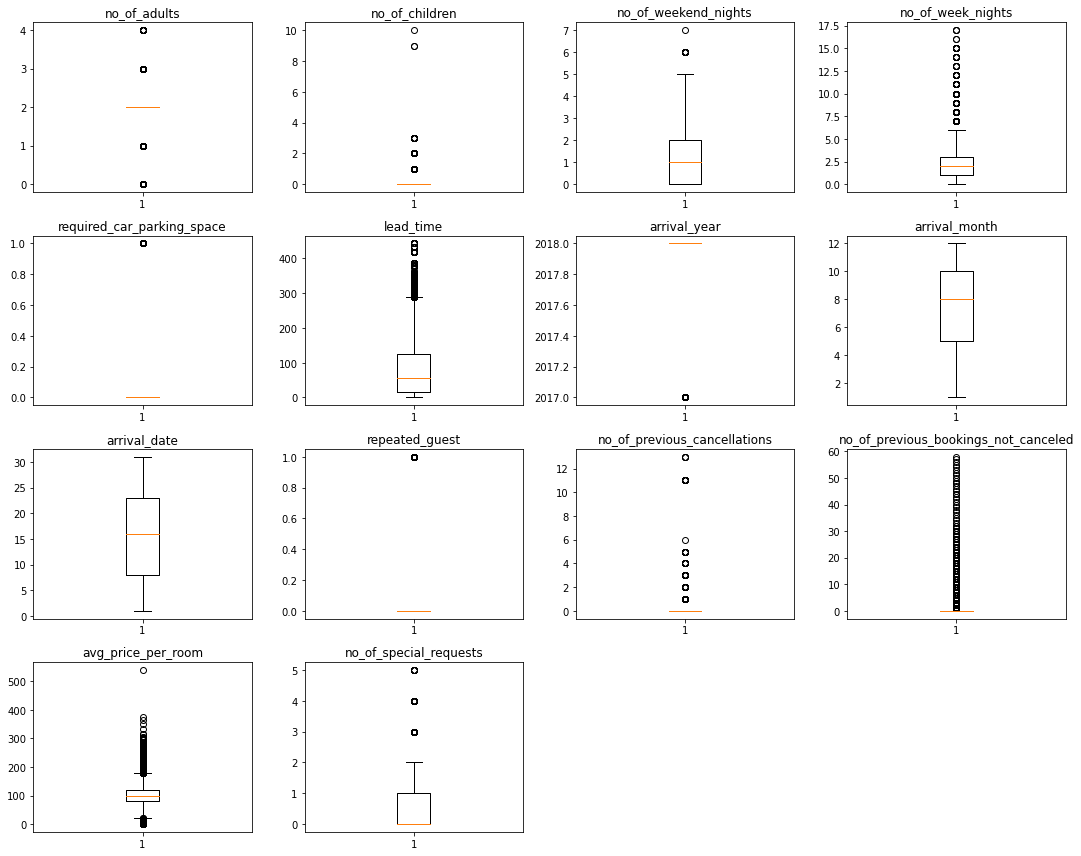

In [17]:
# First create a list of numerical variables
numerical=[ 'no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'required_car_parking_space',
'lead_time', 'arrival_year', 'arrival_month','arrival_date', 'repeated_guest','no_of_previous_cancellations', 
'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(new_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Preparing data for modeling

In [18]:
## first checking the unique variables for categorical data in the  hotels dataset:
attributes=["type_of_meal_plan","room_type_reserved","market_segment_type","booking_status"]
for categorical in attributes:
    values_counts=pd.DataFrame(new_data[categorical].value_counts(normalize=True))
    print(values_counts)

              type_of_meal_plan
Meal Plan 1             0.76733
Not Selected            0.14142
Meal Plan 2             0.09111
Meal Plan 3             0.00014
             room_type_reserved
Room_Type 1             0.77547
Room_Type 4             0.16697
Room_Type 6             0.02663
Room_Type 2             0.01908
Room_Type 5             0.00731
Room_Type 7             0.00436
Room_Type 3             0.00019
               market_segment_type
Online                     0.63994
Offline                    0.29023
Corporate                  0.05560
Complementary              0.01078
Aviation                   0.00345
   booking_status
0         0.67236
1         0.32764


## Checking Multicollinearity

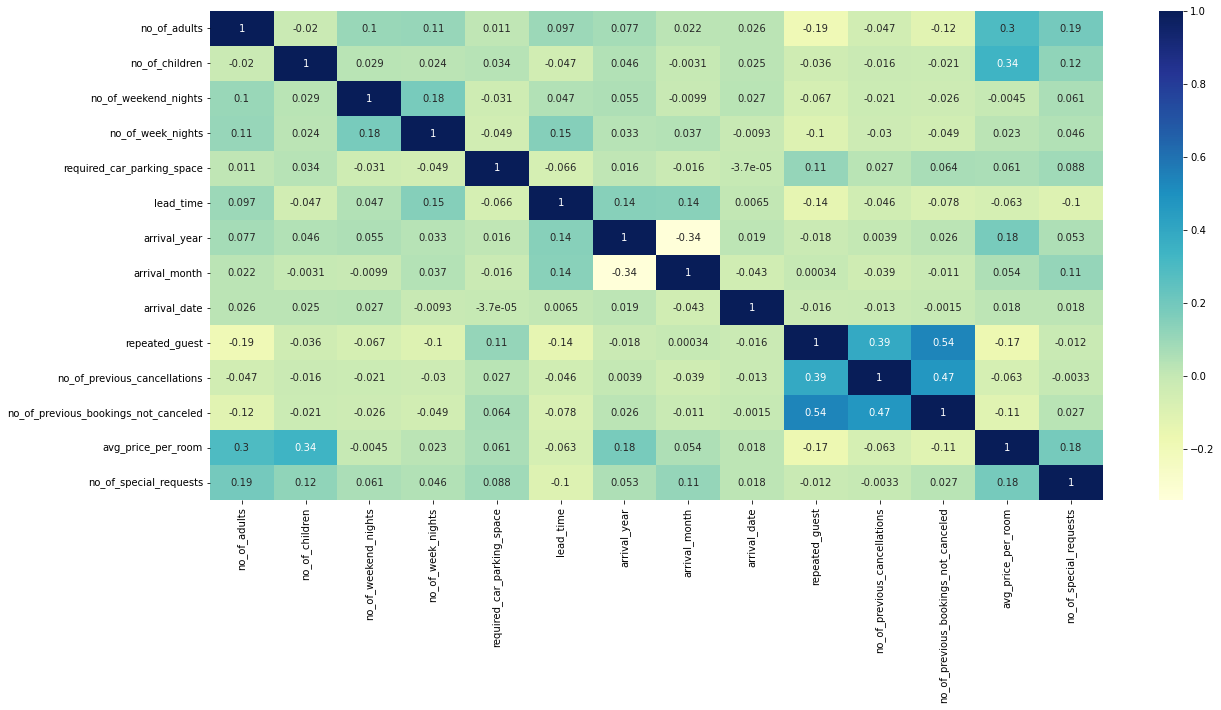

In [19]:
 # First the correlation of numerical data
num_data =[ 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
           'no_of_week_nights', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']  # create a list of numerical data
corr=new_data[num_data].corr() # calculate the correlation of the numerical dataset
# Plot the heatmap 
plt.figure(figsize=(20,9))  # increase the size of the plot
sns.heatmap(corr,annot=True,cbar=True,cmap="YlGnBu");

### Observation
There are no strong positive correlation present between the independent variables  as shown above.<br>
This is an indication that there is no presence of multicollinearity in the dataset.

## Building a Logistic Regression model

In [20]:
## code to compute the dependent and independent variables
X = new_data.drop(["booking_status"],axis=1)  #drop the dependent variable by rows
y = new_data["booking_status"]  # set the dependent/target variable dataset

In [21]:
# first create dummy variables for categorical data 
features=["type_of_meal_plan","room_type_reserved","market_segment_type"]
X=pd.get_dummies(X,columns=features,drop_first=True) 

In [22]:
# split the data into train and  test with the ratio 7:30
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)  

In [23]:
count1=y_train.value_counts(normalize=True)
count2=y_test.value_counts(normalize=True)
count=zip(count1,count2)  # code to combine the count1 and count 2 together.
count=pd.DataFrame(count,columns=["Percentage on Training set", "Percentage on Testing set"])
print(count)
print("The number of training sets are:",len(x_train))
print("The number of testing sets are:",len(x_test))

   Percentage on Training set  Percentage on Testing set
0                     0.67064                    0.67638
1                     0.32936                    0.32362
The number of training sets are: 25392
The number of testing sets are: 10883


In [24]:
# Code to include the intercept to data
X = sm.add_constant(X)

In [27]:
# fitting logistic regression model
model_logit = sm.Logit(y_train, x_train.astype(float)).fit()
print(model_logit.summary())      ## Print the summary of the model

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 19 Jun 2022   Pseudo R-squ.:                  0.3274
Time:                        13:39:52   Log-Likelihood:                -10822.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.1009      0.038      2.685      0.007       0.027       0.175
no_of_children                           0.1629      

## Model performance evaluation

In [330]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_logistic(model, predictor, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictor) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True output")
    plt.xlabel("Predicted output")

In [331]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_logistic(model, predictor, target, threshold=0.5):
    """"
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    
    # checking which probabilities are greater than threshold
    pred = model.predict(predictor) > threshold
    # rounding off the above values to get classes
    prediction = np.round(pred)

    acc = accuracy_score(target, prediction)  # to compute Accuracy
    recall = recall_score(target, prediction)  # to compute Recall
    precision = precision_score(target, prediction)  # to compute Precision
    f1 = f1_score(target, prediction)  # to compute F1-score

    # creating a dataframe of metrics
    data_performance = pd.DataFrame({"Accuracy": acc*100, "Recall": recall*100, "Precision": precision*100, "F1": f1*100,},index=[0],)

    return data_performance

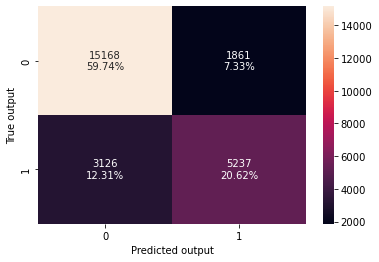

In [332]:
# creating confusion matrix
confusion_matrix_logistic(model_logit, x_train, y_train)

In [333]:
print(" Model performance results on training set(in percentage(%)):")
model_performance_logistic(model_logit, x_train, y_train)

 Model performance results on training set(in percentage(%)):


,Accuracy,Recall,Precision,F1
0,80.35996,62.62107,73.78135,67.74465


### Observation:
From the confusion matrix given above: 
The model predicted that the booking is not canceled where it was actually not cancelled with 59.74%. <br>
The model predicted that the booking was canceled where actually it was canceled with 20.62%. <br>
However  the model have higher accuracy and higher precision  with low recall  and f1 score.<br>
Further insights should be done as low f1 score is an indication that the false negative and false positives are not minimised.


### Multicollinearity

In [334]:
# Lets define a function to check VIF
def checking_vif(predictor):
    vif = pd.DataFrame()
    vif["feature"] = predictor.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictor.values, i)
            for i in range(len(predictor.columns))]
    return vif

In [335]:
checking_vif(x_train)

,feature,VIF
0,no_of_adults,18.32760
1,no_of_children,2.11059
2,no_of_weekend_nights,2.00372
3,no_of_week_nights,3.77628
4,required_car_parking_space,1.07370
5,lead_time,2.47412
6,arrival_year,329.43922
7,arrival_month,7.20629
8,arrival_date,4.21963
9,repeated_guest,1.82791


### Observation:
Number of adults,Arrival year, Average price per room  are numerical variables that shows signs of high multicollinearity ,since thier VIF(variance inflation factor) are greater or equal to 10. <br>
Arrival month shows a sign of moderate multicollinearity. <br>
Some categorical variables have higher VIF greater than 10 , however we may not take them into account as they are not affected much by multicollinearity. <br>
Problems of multicollinearity has to be corrected,since the coefficients of the independent variables will mislead the model for interpreting and not doing predictions.

In [336]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

    features = cols
print(features)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [337]:
x_train1 = x_train[features]
x_test1 = x_test[features]

In [338]:
## Code to train logistic regression on  x-train1 and y-train
model_logit1 = sm.Logit(y_train, x_train1.astype(float)).fit(disp=False)  # code to fit the model
print(model_logit1.summary)      ##  Print summary of the model on the new train dataset

Optimization terminated successfully.
         Current function value: 0.426851
         Iterations 9
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x0000010937228790>>


### Converting coeffients to odds

In [339]:
# converting coefficients to odds
odds = np.exp(model_logit1.params)

# finding the percentage change
perc_change_odds = (np.exp(model_logit1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,1.09999,1.17130,1.11658,1.04317,0.19764,1.01641,0.99853,0.93970,0.06698,1.25480,1.02078,0.23314,1.41793,0.68938,0.76972,0.49524,0.35146,0.22282,0.44389,0.16291
Change_odd%,9.99893,17.13015,11.65829,4.31738,-80.23584,1.64132,-0.14653,-6.02979,-93.30180,25.47990,2.07827,-76.68636,41.79325,-31.06160,-23.02804,-50.47604,-64.85359,-77.71784,-55.61107,-83.70946


In [340]:
print("Model performance results on the new training set:")
logit_model_train_performance = model_performance_logistic(model_logit1,x_train1,y_train) 
logit_model_train_performance

Model performance results on the new training set:


,Accuracy,Recall,Precision,F1
0,80.40328,62.62107,73.89587,67.79288


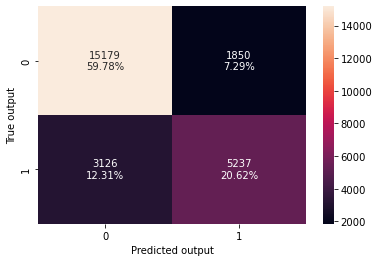

In [341]:
# creating confusion matrix
confusion_matrix_logistic(model_logit1, x_train1, y_train)

#### ROC-AUC
* ROC-AUC on training set

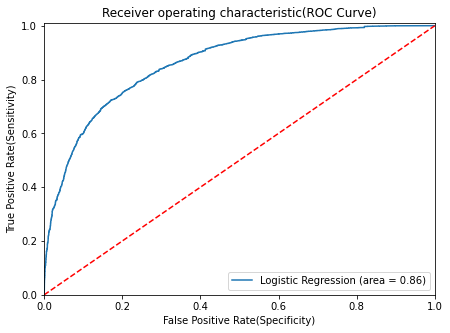

In [342]:
logit_roc_auc_train = roc_auc_score(y_train, model_logit1.predict(x_train1))
FPR, TPR, thresholds = roc_curve(y_train, model_logit1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(FPR, TPR, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate(Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.title("Receiver operating characteristic(ROC Curve)")
plt.legend(loc="lower right")
plt.show()

## Observation: 
86% on the Roc curve represent the area under the curve. <br>
The higher the area the better is the training set on the model.
Further insights will be done to improve the model's performance.

### Model Performance Improvement

## Optimal threshold using AUC-ROC curve

In [343]:
# Optimal threshold as per AUC-ROC curve
FPR, TPR, thresholds = roc_curve(y_train, model_logit1.predict(x_train1))
optimal_idx = np.argmax(TPR - FPR)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(round(optimal_threshold_auc_roc,3))

0.309


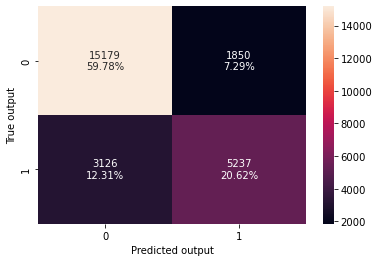

In [344]:
# Code to create a confusion matrix for training set on X-train1 and y-train with optimal threshold auc-roc as threshold 
confusion_matrix_logistic(model_logit1,x_train1,y_train) 

In [345]:
# checking model performance on the training set  
logit_model_train_performance_threshold_auc_roc = model_performance_logistic(model_logit1, x_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Model performance results on training set with optimal threshold(using auc-roc as threshold):")
logit_model_train_performance_threshold_auc_roc

Model performance results on training set with optimal threshold(using auc-roc as threshold):


,Accuracy,Recall,Precision,F1
0,77.17785,78.90709,62.07902,69.48876


## Observation:
By changing the threshold using AUC-ROC curve the accuracy measure decreased by 3% ,whereas recall increased by 16%. <br>
On the other side precision decreased by 12% with a slight increase in F1 score by 1%. <br>
The higher recall means lower the false negative rate(FN). <br>
The lower the precision the greater chance of increasing the false positive in the model. <br>
The higher the F1 score the greater the chance of minimizing the False negative(FN) and False positives(FP), hence further insights should done as F1 score increased by 1% unit.

#### Let's use Precision-Recall curve and see if we can find a better threshold

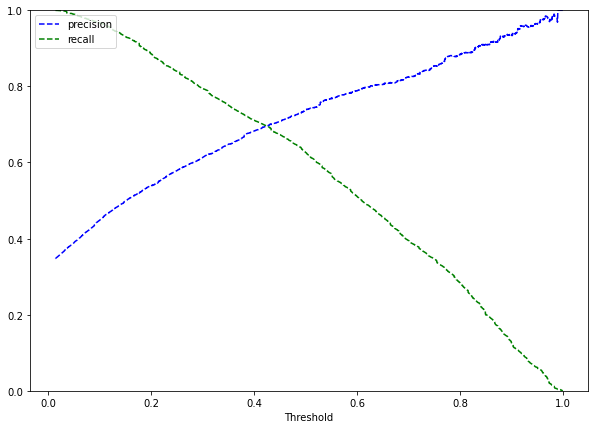

In [346]:
y_scores = model_logit1.predict(x_train1)
prec, recal, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, recal, tre)
plt.show()

In [347]:
# setting the threshold as 0.42 by estimating the cut-off point of precision and recall on the graph above
optimal_threshold = 0.42

#### Checking model performance on training set

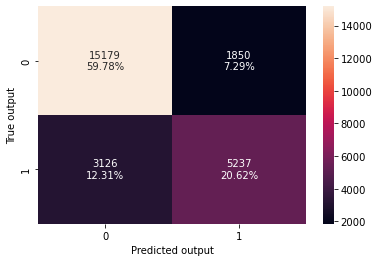

In [348]:
# Code to create a confusion matrix  for x-train 1 set with the optimal threshold curve as the threshold
confusion_matrix_logistic(model_logit1,x_train1,y_train)  

In [349]:
logit_model_train_performance_threshold = model_performance_logistic(
    model_logit1, x_train1, y_train, threshold=optimal_threshold)
print("Model performance results on training set with optimal threshold of:", 0.42)
logit_model_train_performance_threshold

Model performance results on training set with optimal threshold of: 0.42


,Accuracy,Recall,Precision,F1
0,79.91887,69.83140,69.39163,69.61082


### Observation:
By using the precision-recal curve cut-off point  as the optimal threshold resulted to an increase in both recall and F1 score by 7% and 2% respectively. <br>
Precision decreased by 5% , whereas accuracy remained unchanged. <br>
The model impproved as F1 score is higher.


### Let's check the performance on the test set

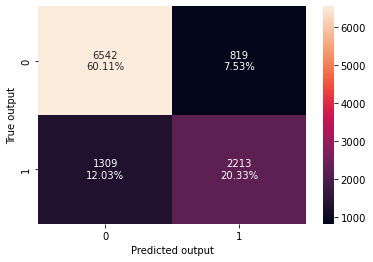

In [350]:
# Creating  a  confusion matrix for testing set
confusion_matrix_logistic(model_logit1,x_test1,y_test) 

In [351]:
## Code to check the model performance on X-test1 and y-test sets
logit_model_test_performance = model_performance_logistic(model_logit1,x_test1,y_test) 
print("Model performance results on testing set:")
logit_model_test_performance 

Model performance results on testing set:


,Accuracy,Recall,Precision,F1
0,80.44657,62.83362,72.98813,67.53128


#### ROC curve on test set

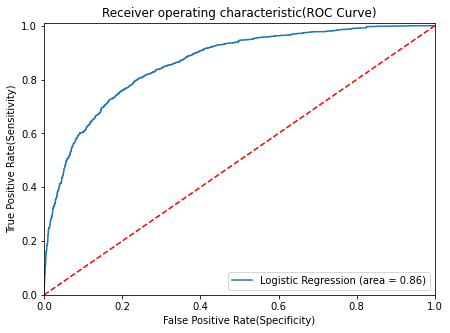

In [352]:
logit_roc_auc_train = roc_auc_score(y_test,model_logit1.predict(x_test1))
FPR, TPR, thresholds = roc_curve(y_test, model_logit1.predict(x_test1))
plt.figure(figsize=(7, 5))
plt.plot(FPR, TPR, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate(Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.title("Receiver operating characteristic(ROC Curve)")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.309** 

In [353]:
optimal_threshold_auc_roc=0.309

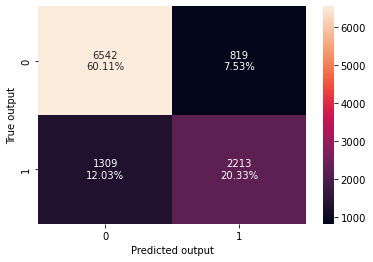

In [354]:
## Code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold
confusion_matrix_logistic(model_logit1,x_test1,y_test) 

In [355]:
# checking model performance for this model
logit_model_test_performance_threshold_auc_roc = model_performance_logistic(
    model_logit1, x_test1, y_test, threshold=optimal_threshold_auc_roc)
print("Model performance results for testing set with optimal threshold of:",optimal_threshold_auc_roc )
logit_model_test_performance_threshold_auc_roc

Model performance results for testing set with optimal threshold of: 0.309


,Accuracy,Recall,Precision,F1
0,77.75430,79.18796,62.29618,69.73372


**Using model with threshold = 0.42**

In [356]:
optimal_threshold_curve=0.42  # set the optimal threshold from the curve as 0.42

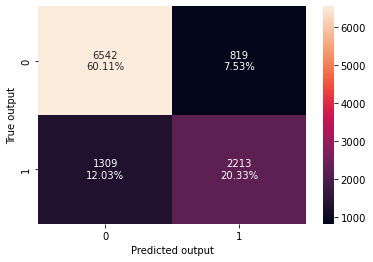

In [357]:
# Creating confusion matrix for X-test1 and y-test using optimal_threshold_curve as threshold
confusion_matrix_logistic(model_logit1,x_test1,y_test)  

In [358]:
logit_model_test_performance_threshold_curve = model_performance_logistic(
    model_logit1, x_test1, y_test, threshold=optimal_threshold_curve)
print("Model performance results on testing set with optimal threshold of:",optimal_threshold_curve)
logit_model_test_performance_threshold_curve

Model performance results on testing set with optimal threshold of: 0.42


,Accuracy,Recall,Precision,F1
0,79.95957,69.78989,68.75524,69.26871


### Model performance summary

In [359]:
# code for training  model performance comparison
models_on_train = pd.concat([logit_model_train_performance.T,logit_model_train_performance_threshold_auc_roc.T,
        logit_model_train_performance_threshold.T,],axis=1,)
models_on_train.columns = ["logistic regression on training set with threshold -0.5",
"logistic regression with threshold -0.309","logistic regression on training set  with threshold -0.42",]
print("Model performance comparison on training set:")
models_on_train

Model performance comparison on training set:


,logistic regression on training set with threshold -0.5,logistic regression with threshold -0.309,logistic regression on training set with threshold -0.42
Accuracy,80.40328,77.17785,79.91887
Recall,62.62107,78.90709,69.83140
Precision,73.89587,62.07902,69.39163
F1,67.79288,69.48876,69.61082


### Observation:
By changing the threshold level to 0.309 , the accurary score and precision declined by 3% and 12% respectively.
However Recall and F1 score improved by 16%  and 1% respectively. <br>
The higher the recall score  the better chance of minimizing the false negatives(FN) from the model and the higher the precision the better chance of minimizing the false positives(FP). <br>
The higher the f1 score the better chance of minimizing both the false negatives(FN) and false positives(FP) in the model. <br>
However , by changing the threshold to 0.42 the training set performance improved as F1 score and recall increased  by more than 1% as compared to when the threshold was 0.309 with a slight declined in precision score. <br>
The accuracy score remained unchanged. <br>
The higher the F1 score the better chance of minimizing both the false negatives and false positives in the model.



In [360]:
# Code for test model performance comparison 
models_on_test = pd.concat([logit_model_test_performance.T,logit_model_test_performance_threshold_auc_roc.T,
                logit_model_test_performance_threshold_curve.T,], axis=1,)
models_on_test.columns = ["logistic regression on testing set with threshold -0.5",
    "logistic regression on testing set with threshold -0.309", "logistic regression on testing set with threshold -0.42",]

print("Model performance comparison on testing set:")
models_on_test

Model performance comparison on testing set:


,logistic regression on testing set with threshold -0.5,logistic regression on testing set with threshold -0.309,logistic regression on testing set with threshold -0.42
Accuracy,80.44657,77.75430,79.95957
Recall,62.83362,79.18796,69.78989
Precision,72.98813,62.29618,68.75524
F1,67.53128,69.73372,69.26871


### Observation:
As compared to the training set, the testing set also improved when changing the threshold to 0.42.
The accuracy score on the testing set remained unchanged when threshold is changed to 0.42 <br>
Both recall and F1 score also increased as compared to the default threshold of 0.5.
The higher the F1 score the better the chance of minimizing both the false negatives and false positive.
The model with threshold of 0.42 is the best model for inference.


## Final Model Summary

In [361]:
### Applying multicollinearity on the final model.

In [362]:
# Lets define a function to check VIF
def checking_vif(predictor):
    vif = pd.DataFrame()
    vif["feature"] = predictor.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictor.values, i)
            for i in range(len(predictor.columns))]
    return vif

In [401]:
checking_vif(x_train1)

,feature,VIF
0,no_of_adults,18.08339
1,no_of_children,2.10720
2,no_of_weekend_nights,1.98612
3,no_of_week_nights,3.74261
4,required_car_parking_space,1.07294
5,lead_time,2.37749
6,arrival_year,34.45934
7,arrival_month,7.17251
8,repeated_guest,1.56346
9,no_of_previous_cancellations,1.20873


In [402]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

    features = cols
print(features)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [403]:
x_train2 = x_train1[features]
x_test2 = x_test1[features]

In [404]:
## Code to train logistic regression on  x-train2 and y-train
best_model = sm.Logit(y_train, x_train2.astype(float)).fit()  # code to fit the model
print(best_model.summary()) 

Optimization terminated successfully.
         Current function value: 0.426851
         Iterations 9
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x0000010912DBB910>>


In [405]:
# converting coefficients to odds : logistic regression
odds = np.exp(best_model.params)

# finding the percentage change
perc_change_odds = (np.exp(best_model.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,1.09999,1.17130,1.11658,1.04317,0.19764,1.01641,0.99853,0.93970,0.06698,1.25480,1.02078,0.23314,1.41793,0.68938,0.76972,0.49524,0.35146,0.22282,0.44389,0.16291
Change_odd%,9.99893,17.13015,11.65829,4.31738,-80.23584,1.64132,-0.14653,-6.02979,-93.30180,25.47990,2.07827,-76.68636,41.79325,-31.06160,-23.02804,-50.47604,-64.85359,-77.71784,-55.61107,-83.70946


## Building a Decision Tree model

In [367]:
X = new_data.drop(["booking_status"], axis=1)
Y = new_data["booking_status"]
## Complete the code to create dummies for X
X = pd.get_dummies(X,columns=['type_of_meal_plan', 'room_type_reserved','market_segment_type'],drop_first=True) 
## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train) ## Fit decision tree on train data

DecisionTreeClassifier(random_state=1)

### Codes to define the confusion matrix and model performance for decision tree dataset

In [368]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [369]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    data_perf = pd.DataFrame(
        {"Accuracy": acc*100, "Recall": recall*100, "Precision": precision*100, "F1": f1*100,},
        index=[0],
    )

    return data_perf

#### Checking model performance on training set

In [370]:
print("Model performance on training set for decision tree(in percentage(%))")
decision_tree_performance_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_performance_train

Model performance on training set for decision tree(in percentage(%))


,Accuracy,Recall,Precision,F1
0,99.42108,98.66077,99.57760,99.11706


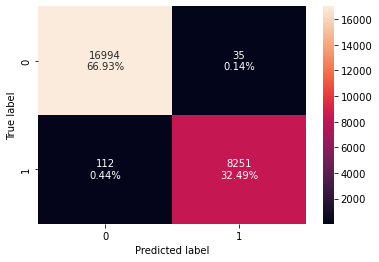

In [371]:
confusion_matrix_sklearn(model,X_train,y_train) ## Code to create confusion matrix for train data

#### Checking model performance on test set

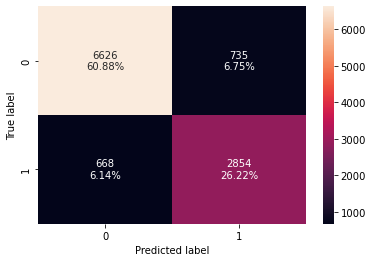

In [372]:
confusion_matrix_sklearn(model,X_test,y_test) ## Code to compute a  confusion matrix for test data

In [373]:
## Code to compute  performance measures on test set
print("Model performance on testing set for decision tree(in percentage(%))")
decision_tree_performance_test = model_performance_classification_sklearn(model, X_test, y_test) 
decision_tree_performance_test

Model performance on testing set for decision tree(in percentage(%))


,Accuracy,Recall,Precision,F1
0,87.10833,81.03350,79.52076,80.27000


### Observation:
Comparing the model performance between the training set and the test set, accuracy score,recall,precision and F1 score declined  by larger margins. <br>
This is a sign of overfitting problems. <br>
So prunning should be done to reducing overfitting problems.

###  We need to apply pruning on the tree

In [374]:
## First lets check the important features in the training set

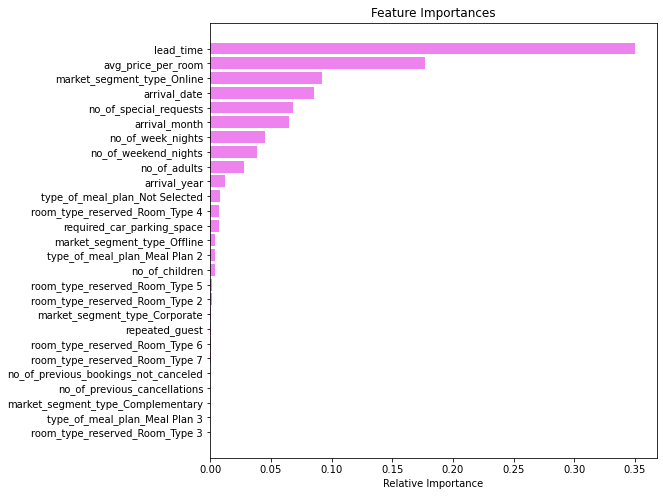

In [375]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation :
There are 16 features in the training that are regarded as importance. <br>
Those include lead time as the highest, followed by average price per room,market segment type online with number of children as the least importance feature.

#### Pre-pruning

In [376]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70], }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

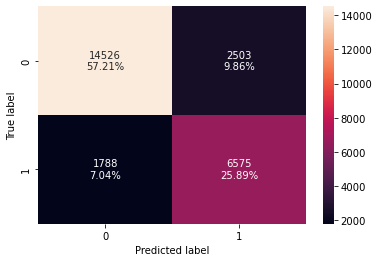

In [377]:
confusion_matrix_sklearn(estimator,X_train,y_train) ## Code to display the confusion matrix for train data

In [378]:
## Code to compute performance measures on train set
print("Model performance on training set for decision tree(in percentage(%) after pre-pruning)")
decision_tree_tune_performance_train = model_performance_classification_sklearn(estimator,X_train,y_train) 
decision_tree_tune_performance_train

Model performance on training set for decision tree(in percentage(%) after pre-pruning)


,Accuracy,Recall,Precision,F1
0,83.10098,78.62011,72.42785,75.39705


#### Checking performance on test set

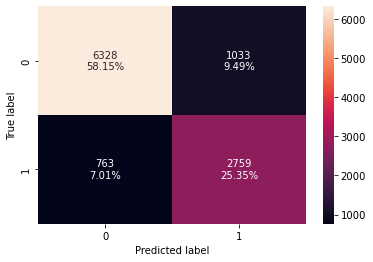

In [379]:
confusion_matrix_sklearn(estimator,X_test,y_test) ## Code to display the  confusion matrix for test data

In [380]:
## Code to compute performance measures on test set
print("Model performance on testing set for decision tree(in percentage(%) after pre-pruning)")
decision_tree_tune_performance_test = model_performance_classification_sklearn(estimator,X_test,y_test) 
decision_tree_tune_performance_test

Model performance on testing set for decision tree(in percentage(%) after pre-pruning)


,Accuracy,Recall,Precision,F1
0,83.49720,78.33617,72.75844,75.44435


### Visualizing the Decision Tree

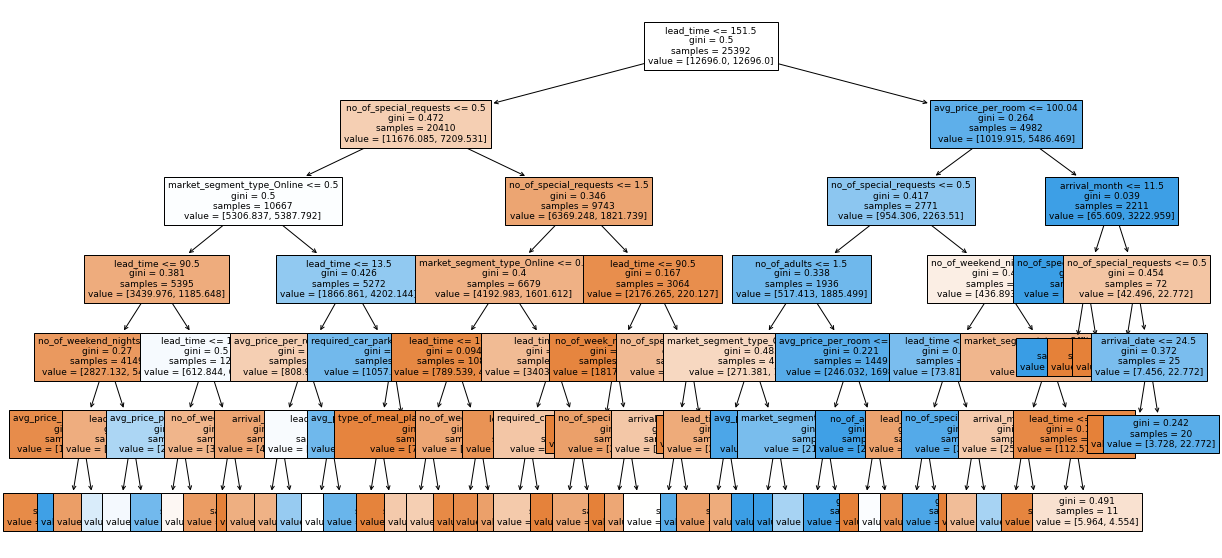

In [381]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

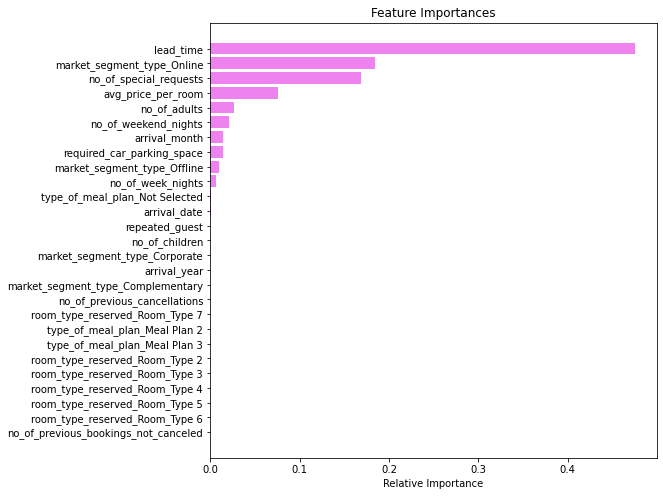

In [382]:
# importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation:
After pre-pruning , only 10 features are regarded importance with lead time,market segment type online,number of special requests ,average price per room and number of adults as the top five.
According to the feature importance plot above only those ten column have an impact on predicting the booking status .

**Cost Complexity Pruning**

In [383]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [384]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1837,0.00890,0.32806
1838,0.00980,0.33786
1839,0.01272,0.35058
1840,0.03412,0.41882


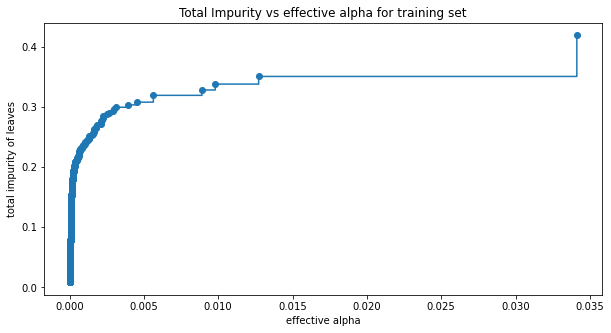

In [385]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [386]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier( random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train,y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


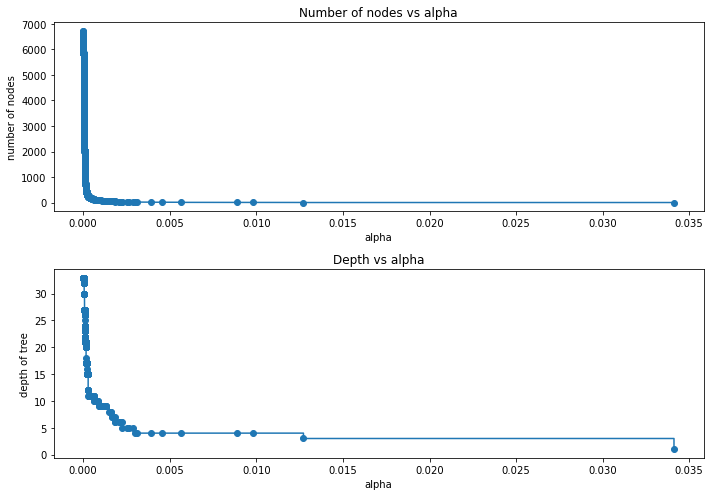

In [387]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 score vs alpha for training and testing sets

In [388]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

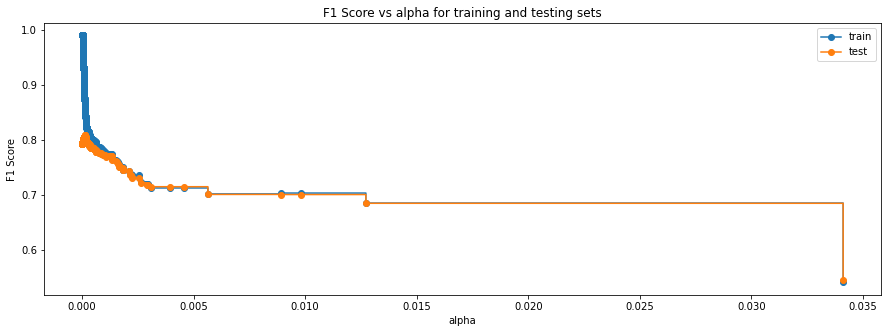

In [389]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [390]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

confusion matrix for best model on training set


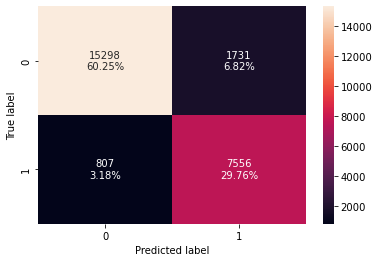

In [391]:
print("confusion matrix for best model on training set")
confusion_matrix_sklearn(best_model, X_train, y_train)  # code to display a confusion matrix for train data on the  best model

In [392]:
print(" Best model performance on training set for decision tree(in percentage(%))")
decision_tree_post_performance_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_performance_train

 Best model performance on training set for decision tree(in percentage(%))


,Accuracy,Recall,Precision,F1
0,90.00473,90.35035,81.36104,85.62040


#### Checking performance on test set

Confusion matrix for best model on testing set


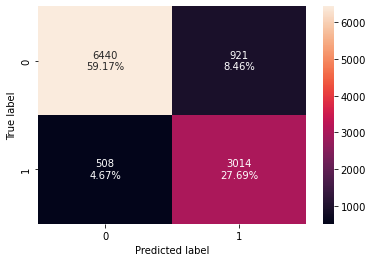

In [393]:
print("Confusion matrix for best model on testing set")
confusion_matrix_sklearn(best_model, X_test, y_test)## Code to display a confusion matrix for test data on best model

In [394]:
## Code to compute performance measures of test set on best model
print(" Best model performance on testing set for decision tree(in percentage(%))")
decision_tree_post_test =model_performance_classification_sklearn(best_model, X_test, y_test) 
decision_tree_post_test

 Best model performance on testing set for decision tree(in percentage(%))


,Accuracy,Recall,Precision,F1
0,86.86943,85.57638,76.59466,80.83680


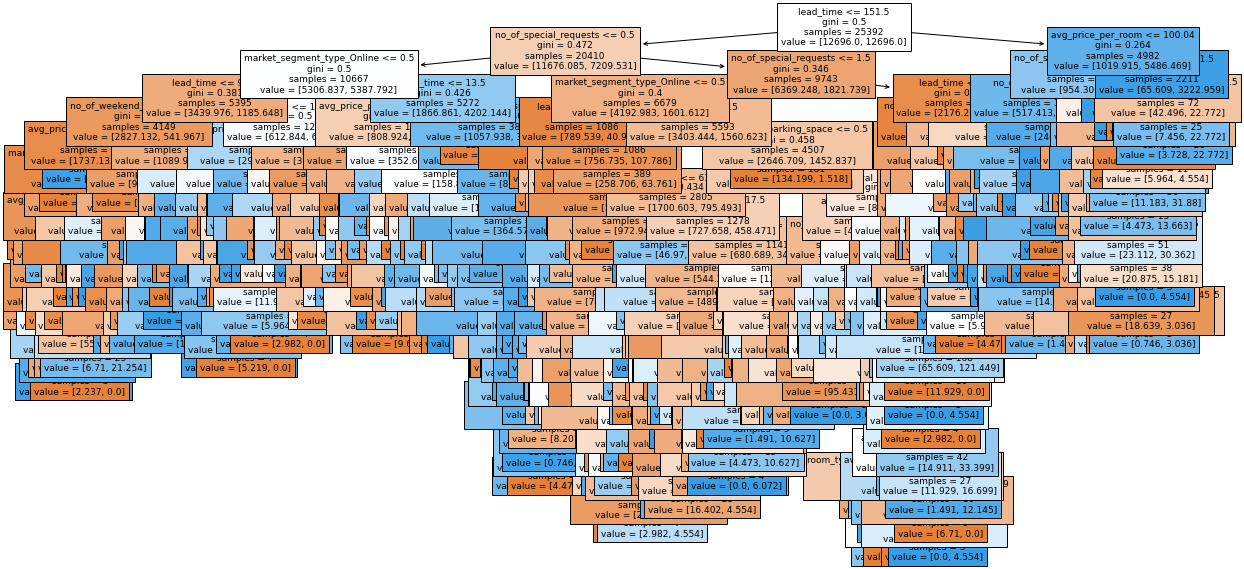

In [395]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

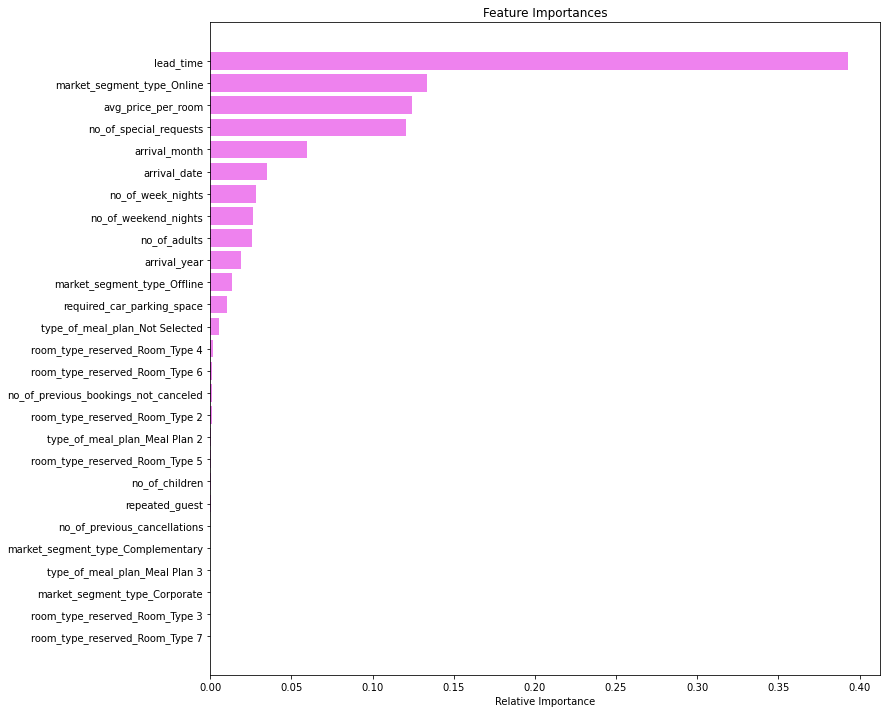

In [397]:
# code to construct the feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

#### Comparing decision Tree models

In [398]:
# Training performance measures comparison

models_train = pd.concat( [decision_tree_performance_train.T,decision_tree_tune_performance_train.T,
        decision_tree_post_performance_train.T,], axis=1,)
models_train.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training model performance measures comparison:")
models_train

Training model performance measures comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,99.42108,83.10098,90.00473
Recall,98.66077,78.62011,90.35035
Precision,99.57760,72.42785,81.36104
F1,99.11706,75.39705,85.62040


#### Observation: 
Comparing the performance measures on the training set before pruning and after pruning, all peformance measures declined slighly after post pruning. <br>
However , when comparing performance between pre and post pruning only , all performance measures improved.<br>
A higher value of F1 score  which indicate that there is greater chance of minimizing the false negatives and false positives in the  traininig set.


In [399]:
# Testing performance measures comparison
models_test = pd.concat([decision_tree_performance_test.T,
        decision_tree_tune_performance_test.T,
        decision_tree_post_test.T,],axis=1)
models_test.columns = ["Decision Tree sklearn","Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)",]
print("Testing  model performance measures comparison:")
models_test

Testing  model performance measures comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,87.10833,83.49720,86.86943
Recall,81.03350,78.33617,85.57638
Precision,79.52076,72.75844,76.59466
F1,80.27000,75.44435,80.83680


### Observation:
Performance measures on the testing set on pre and post pruning improved on recall and F1 score.
The precision measure declined slightly whereas accuracy remained unchanged.
The higher the recall value , the better the model as the false negatives are mininimized .
However since the f1 score increased slighly, then the model performance of testing set has improved too.

## Actionable Insights and Recommendations

From the analysis of feature importance on the decision tree model, it was found that 13  columns of the indepedent variables has an impact in predicting the booking cancellation status. <br>   
And those includes lead time,market segment type offline, average price per room,no of special requests,arrival month, number of weeks nights,number of weekends nights,number of adults and others.

1. For every increase in one unit of number of adults, the  odds on booking  cancellationstatus will increase by 1.09999 , when all other remain unchanged. <br>

2. For every increase in one unit of number of weekends nights, the odds on booking cancellation  status will increase by 1.11658 , when all other remain unchanged. <br>

3. For every increase in one unit of number of week nights, the odds on booking cancellation  status will increase by  1.04317 , when all other remain unchanged. <br>

4. For every increase in one unit of required car parking space, the  odds on booking cancellation  status will increase by 0.19764 , when all other remain unchanged. <br>

5. For every increase in one unit of lead time , the odds on booking cancellation  status  will increase by  1.01641	, when all other remain unchanged. <br>

6. For every increase in one unit on average price per room , the odds on booking cancellation  status  will increase by 1.02078	, when all other remain unchanged. <br>

7. For every increase in one unit of arrival year, the  odds on booking cancellation status will increase by 0.99853 , when all other remain unchanged. <br>

8. For every increase in one unit of arrival month, the  odds on booking cancellation status will increase by 0.93970 , when all other remain unchanged. <br>

9. For every increase in one unit of repeated guest, the odds on booking cancellation  status will increase by  0.06698	, when all other remain unchanged. <br>

10. For every increase in one unit of offline market segment type, the odds of booking to cancel relative to not cancelling  will increase by  0.16291	, when all other remain unchanged. <br>
11.  For every increase in one unit on type of meal not selected , the odds of booking to cancel relative to not cancelling  will increase by  1.41793	, when all other remain unchanged. <br>

12. For every increase in one unit of  room_type_reserved_Room_Type 2 , the  odds on booking cancellation status will increase by 0.68938	  , when all other remain unchanged. <br>

13.For every increase in one unit of room_type_reserved_Room_Type 4, the  odds on booking cancellation  status will increase by 0.76972	 , when all other remain unchanged. <br>



The hotel should focus  on other market segment type such as corporate,aviation and complementary in order to increase profitability.